Task: To improve the greenery of the images

First, let's see the two images

In [4]:
#importing libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

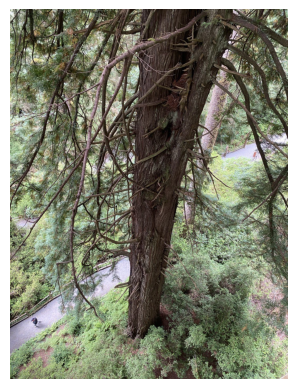

In [5]:
#image 1
img_1 = plt.imread("E:/Learning_skills/Computer_vision/data/greenery/image_1.jpg")
plt.axis(False)
plt.imshow(img_1)

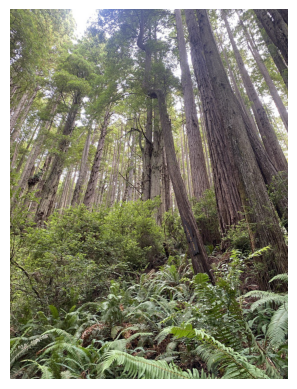

In [6]:
#image 2
img_2 = plt.imread("E:/Learning_skills/Computer_vision/data/greenery/image_2.jpg")
plt.axis(False)
plt.imshow(img_2)

Let's focus on the image 1 to improve it's greenery.

Let's try the following steps:
- Take the pixels in RGB color space where the 'green' color dominates other two channels.
- Convert the image into HSL color space, and increase the saturation by some percentage of the particular pixels. Also, play around with luminous value

In [7]:
image_1_bgr = cv2.imread('E:/Learning_skills/Computer_vision/data/greenery/image_1.jpg', 1)


In [8]:
#getting the green dominant pixels
green_dominant_1 = (image_1_bgr[:, :, 1] > image_1_bgr[:, :, 0]) & (image_1_bgr[:, :, 1] > image_1_bgr[:, :, 2])

In [9]:
green_dominant_1

array([[False, False, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [12]:
# Function for Increasing saturation of  the green dominant pixels 
def change_sat_value(image, mask, saturation_increment = 1, brightness_increment=1):


    #changing the image into HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    #splitting the color channels
    hue, saturation, value = cv2.split(image_hsv)
    
    #increasing the saturation by ratio(saturation)
    saturation[mask] = np.clip(saturation[mask] * saturation_increment, 0, 255)
    
    #increasing the brightness ratio
    value[mask] = np.clip(value[mask] * brightness_increment, 0, 255)
    image_improved_hsv = cv2.merge([hue, saturation, value])

    #converting back to RGB
    image_improved_rgb = cv2.cvtColor(image_improved_hsv, cv2.COLOR_HSV2RGB)

    #Displaying the original image and improved image
    #original image
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    #Enhanced image
    plt.subplot(1, 2, 2)
    plt.imshow(image_improved_rgb)
    plt.title('Enhanced Image')
    plt.axis('off')

    plt.show()

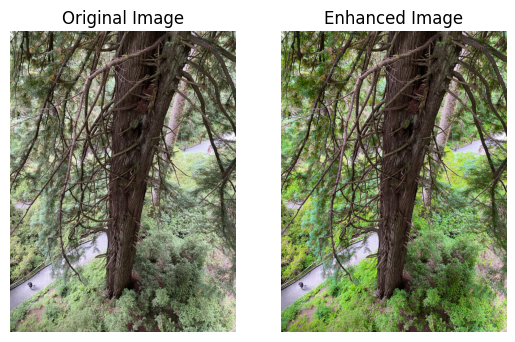

In [21]:
change_sat_value(img_1,green_dominant_1, 2.2, 1)

For image 2, We are going to do the same 

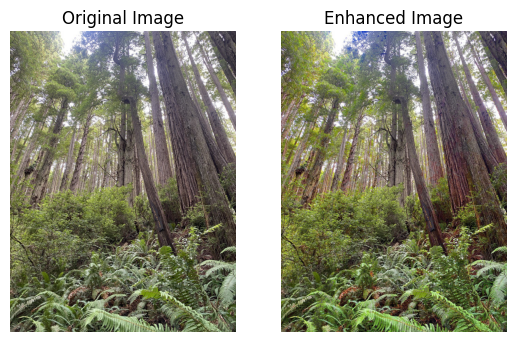

In [28]:
change_sat_value(img_2,green_dominant_1, 2)

**Overall conclusion:**
- By increasing the saturation of green dominant pixels in HSV color space, we can enhance the greenery of the image.